In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly

C:\Users\acer\AppData\Local\Temp\ipykernel_33588\3647468193.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('CSI-FEI.csv', parse_dates=['Survey Round'], index_col='Survey Round')


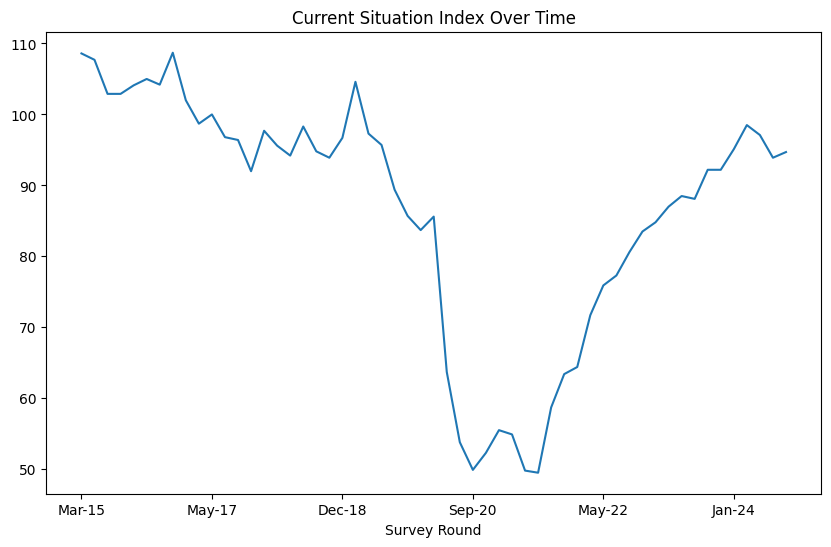

In [2]:

data = pd.read_csv('CSI-FEI.csv', parse_dates=['Survey Round'], index_col='Survey Round')

# Visualize the data
data['CSI'].plot(title='Current Situation Index Over Time', figsize=(10, 6))
plt.show()

In [3]:
len(data)

55

In [121]:
len(train)

44

In [122]:
train[-1]

83.5

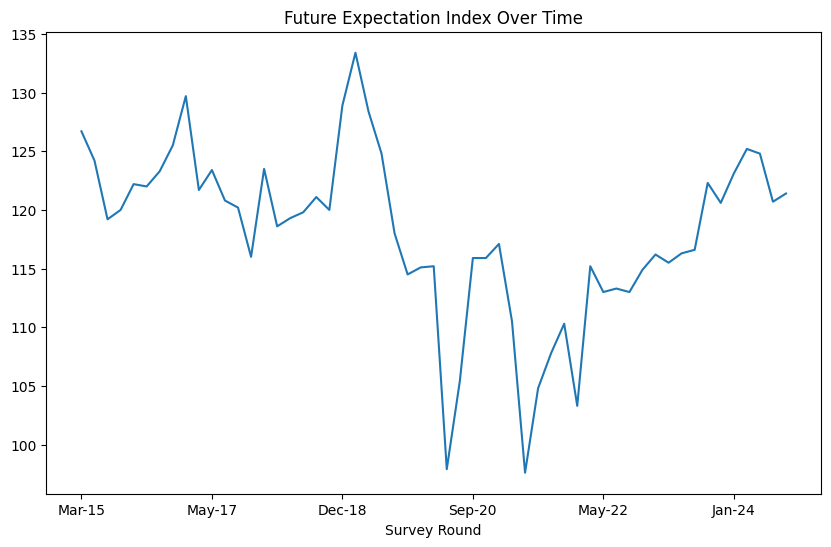

In [6]:
data['FEI'].plot(title='Future Expectation Index Over Time', figsize=(10, 6))
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(data['CSI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.7282074729480548
p-value: 0.4166408536819458


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Define the range of p, d, q
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all combinations of p, d, q
pdq_combinations = list(product(p, d, q))

# Initialize variables to store the best model
best_aic = float("inf")
best_order = None
best_model = None

# Iterate over all combinations of p, d, q
for order in pdq_combinations:
    try:
        model = ARIMA(data['Survey Round'], order=order)
        fit_model = model.fit()
        if fit_model.aic < best_aic:
            best_aic = fit_model.aic
            best_order = order
            best_model = fit_model
    except:
        continue

# Display the best order and AIC
print(f"Best ARIMA order: {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMA order: None
Best AIC: inf


In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

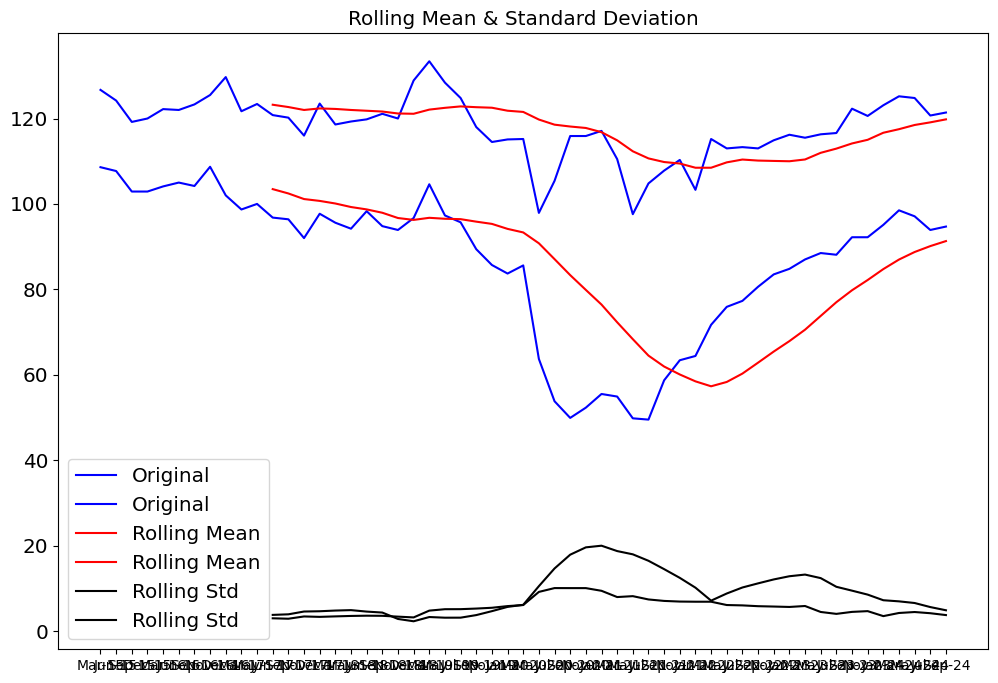

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [41]:
test_stationarity(data)

In [107]:
train_size = int(len(data) * 0.8)
train, test = data['CSI'][:train_size], data['CSI'][train_size:]

In [112]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
# model = ARIMA(train, order=(1, 1, 1))  # Adjust p, d, q based on AIC/BIC tuning
model = ARIMA(train, order=(0, 2, 2))  # Adjust p, d, q based on AIC/BIC tuning
# model = ARIMA(train, order=(17,8,4))  # Adjust p, d, q based on AIC/BIC tuning
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

In [113]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 4.686107028616902


In [114]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize': 'medium',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

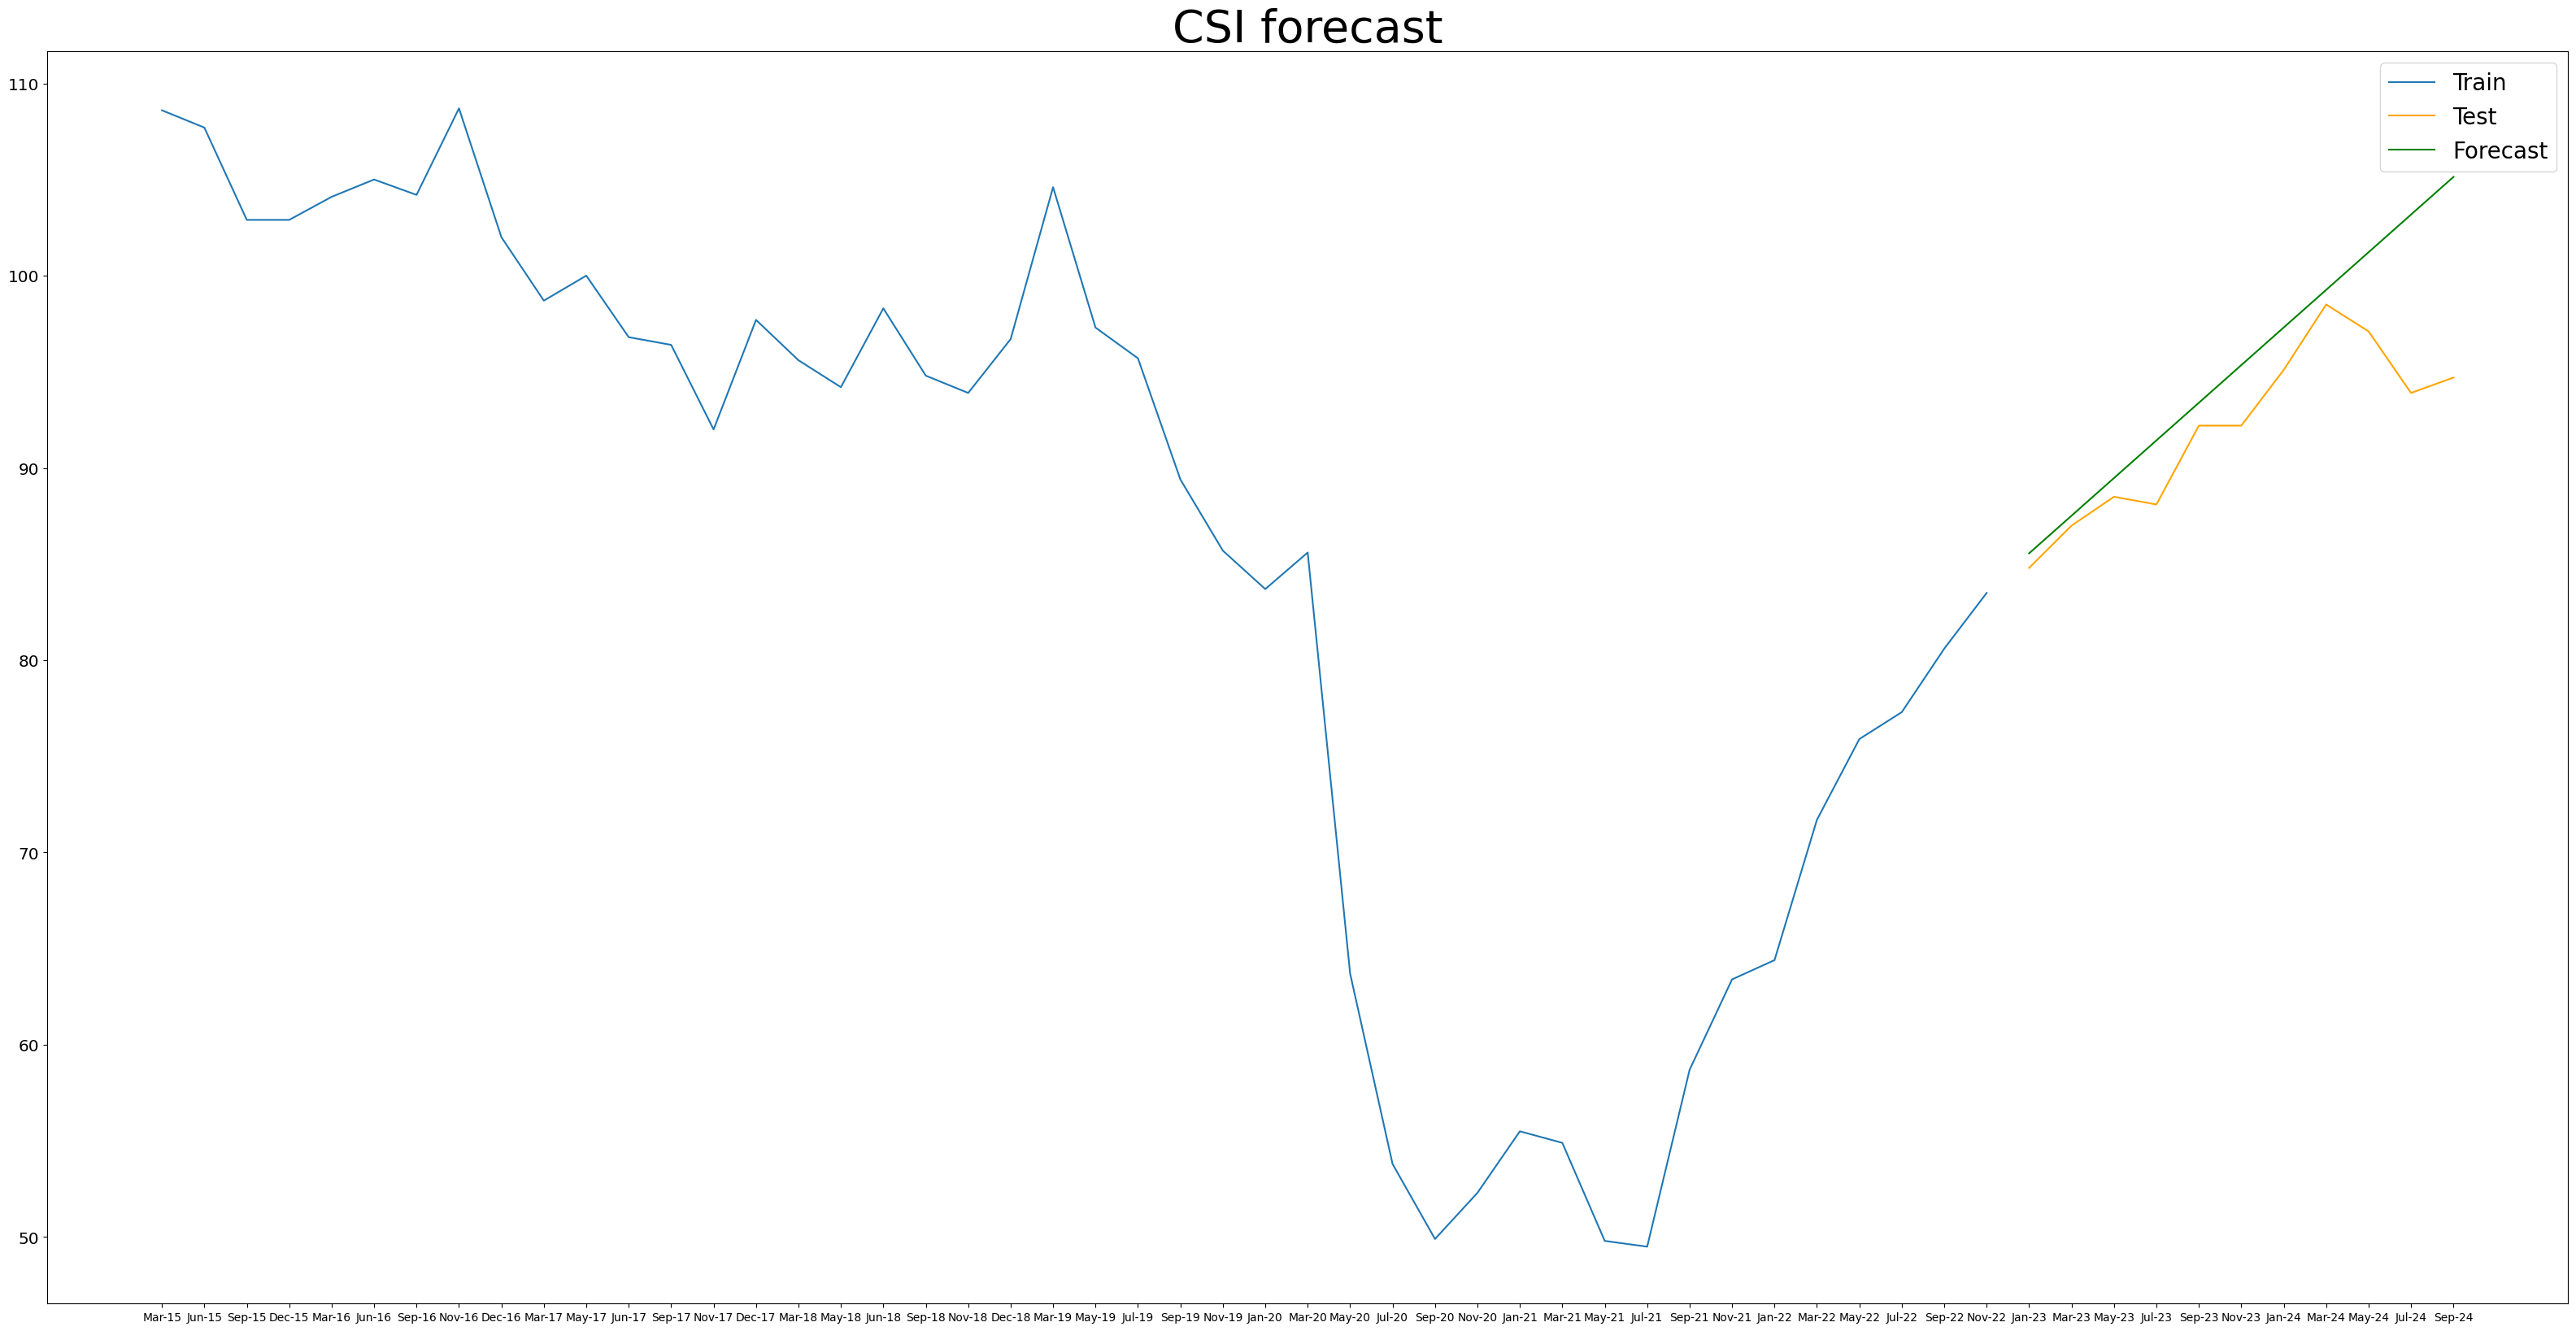

In [115]:
plt.figure(figsize=(40, 20))
plt.title("CSI forecast", fontsize =40)
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend(prop={'size': 20})
plt.show()

In [116]:

final_model =ARIMA(train, order=(0, 2, 2))  # Adjust p, d, q based on AIC/BIC tuning
final_model_fit = final_model.fit()

# Forecast
next_period_csi = final_model_fit.forecast(steps=1)

c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

In [117]:
next_period_csi.values[0]

85.55876546175632

In [119]:
forecast

44     85.558765
45     87.516344
46     89.473922
47     91.431501
48     93.389079
49     95.346658
50     97.304236
51     99.261815
52    101.219393
53    103.176972
54    105.134550
Name: predicted_mean, dtype: float64

In [123]:
forecast.values

array([ 85.55876546,  87.51634394,  89.47392242,  91.4315009 ,
        93.38907938,  95.34665786,  97.30423634,  99.26181482,
       101.2193933 , 103.17697178, 105.13455026])

In [31]:
next_period_csi = model_fit.forecast(steps=len(test+1))

c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
next_period_csi

44    84.639501
45    85.466709
46    86.067213
47    86.503142
48    86.819600
49    87.049329
50    87.216099
51    87.337164
52    87.425049
53    87.488849
54    87.535164
Name: predicted_mean, dtype: float64

In [34]:
import numpy as np
forecasted_csi = np.array(next_period_csi)[-1]

In [36]:
forecasted_csi


87.53516386502507

In [ ]:
model = ARIMA(data, order=(1, 1, 1))  # Adjust p, d, q based on AIC/BIC tuning
model_fit = model.fit()
